# Part 1

Grid generated successfully!
Shape of X: (1000, 1000)
Shape of Y: (1000, 1000)
X range: -2.5 to 1.0
Y range: -1.5 to 1.5


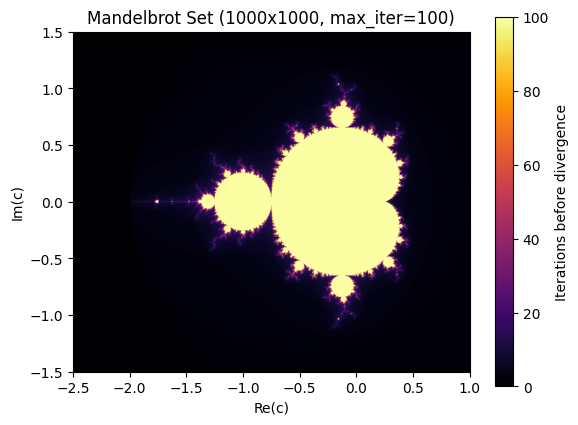

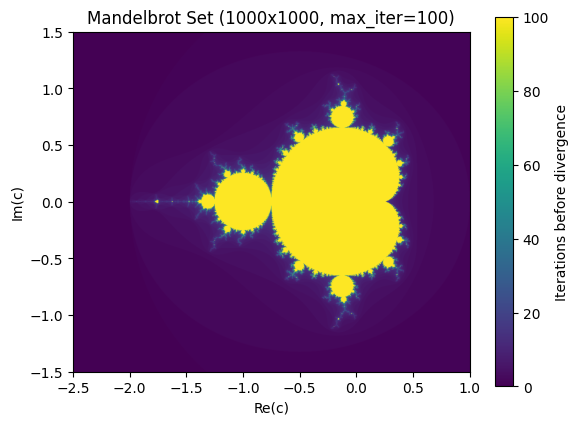

In [1]:
#Hmm, Not really sure what fractals are, let's see where I go with this one
#Alright, I have some kind of function, I guess I will write that first
import matplotlib.pyplot as plt
def mandelbrot(c, max_iter=100):
    z = 0 #0 + 0j
    for n in range(max_iter):
        z = z*z + c #Iteration formula
        if abs(z) > 2:   # diverged
            return n
    return max_iter      # did not diverge within the limit

#Ok, now we have to do some kind of visualization? I still dont seem to get it
import numpy as np

#Grid Parameters
xmin = -2.5
xmax = 1.0
ymin = -1.5
ymax = 1.5
width = height = 1000
max_iter = 100
#Now, generating the grid
#What does the linspace command do: obtains discrete points, we need 1000x1000 2d plane
x = np.linspace(xmin,xmax,width) #Ok, 2 arrays have been created so far
y = np.linspace(ymin,ymax,height)

X , Y = np.meshgrid(x, y) #And this is creating a mesh of our arrays in 2D
#Sanity Check:
print("Grid generated successfully!")
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
print("X range:", X.min(), "to", X.max())
print("Y range:", Y.min(), "to", Y.max())
#Now we have to do this mandelbrot iteration on all the points obtained
#Ah!! So you mean X should be Real part, and Y is imaginary part!
C = X + 1j * Y
#So C is some 1000x1000 2D array, and for each value of C, we do the iteration, got it
#First, initialize the grid with a double for loop:

counts = np.zeros((height, width))  # store iteration count for each point

#Now, Mandelbrot for every single value of X and Y:
for i in range(height):
    for j in range(width):
        c = X[i, j] + 1j * Y[i, j]  # complex point
        counts[i, j] = mandelbrot(c, max_iter = max_iter)

plt.imshow(counts, extent=(xmin, xmax, ymin, ymax),
           origin='lower', cmap='inferno')
plt.colorbar(label='Iterations before divergence')
plt.title(f'Mandelbrot Set ({width}x{height}, max_iter={max_iter})')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.show()

plt.imshow(counts, extent=(xmin, xmax, ymin, ymax),
           origin='lower', cmap='viridis')
plt.colorbar(label='Iterations before divergence')
plt.title(f'Mandelbrot Set ({width}x{height}, max_iter={max_iter})')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.show()
# Observations:
# Color represents how many iterations the point survived
# Before it diverged. Yellow/White: Many!!
# Black/Purple: Immediately diverged
# So our mandelbrot set is only the light images
# Looks beautiful



# Part 2

z0 = (-0.5+0.2j)  → root flag = 0
z0 = (0.5+0.9j)   → root flag = 1
z0 = (0.5-0.9j)   → root flag = 2
z0 = (2+1j)       → root flag = 1


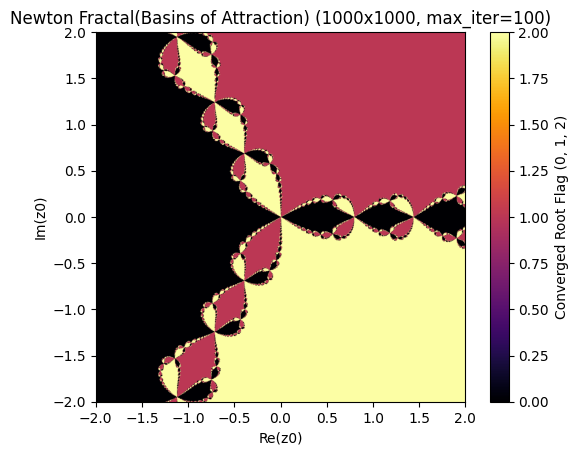

In [2]:
import cmath
import numpy as np

# Precompute the true roots of z^3 + 1 = 0
ROOTS = [
    -1 + 0j,                          # flag 0 -> -1
    np.exp(1j * np.pi / 3),          # flag 1 -> e^{iπ/3}
    np.exp(-1j * np.pi / 3)          # flag 2 -> e^{-iπ/3}
]
def newton_fractal(z0, tol=1e-6, max_iter=100):
    z = complex(z0)
    
    for n in range(1,max_iter+1):
        #Compute fz and dfz
        fz = z**3+1
        dfz = 3 * z**2
        
        if dfz == 0:
            #Perform a small perturbation
            z+= 1e-12 + 1e-12j
            dfz = 3*z**2
        z = z - fz/dfz #Newton's iteration
        #Check dist from each root
        dists = [abs(z-r) for r in ROOTS]
        index = np.argmin(dists)
        if dists[index] < tol:
            return index
    #If not converged:
    return -1

#Tests
tests = [-0.5 + 0.2j, 0.5 + 0.9j, 0.5 - 0.9j, 2 + 1j]
for z0 in tests:
    flag = newton_fractal(z0)
    print(f"z0 = {z0:<12} → root flag = {flag}")

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
xmin, xmax = -2.0, 2.0
ymin, ymax = -2.0, 2.0
width = height = 1000
max_iter = 100
tol = 1e-6
# Build grid (linspace + meshgrid)
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
C = X + 1j * Y  
flags = np.zeros((height, width))  # store flsg for each point
flags = flags - 1
#Now, Newton's(Same function) for every single value of X and Y:
for i in range(height):
    for j in range(width):
        c = X[i, j] + 1j * Y[i, j]  # complex point
        flags[i, j] = newton_fractal(c, max_iter = max_iter)

plt.imshow(flags, extent=(xmin, xmax, ymin, ymax),
           origin='lower', cmap='inferno')
plt.colorbar(label='Converged Root Flag (0, 1, 2)')
plt.title(f'Newton Fractal(Basins of Attraction) ({width}x{height}, max_iter={max_iter})')
plt.xlabel('Re(z0)')
plt.ylabel('Im(z0)')
plt.show()



# Part 3

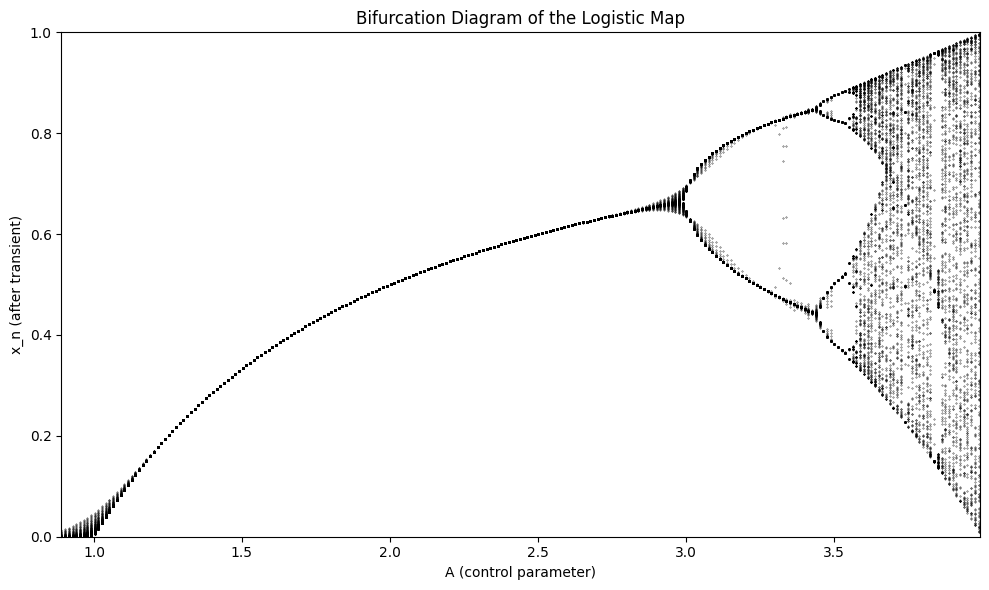

C:\Users\aadii\AppData\Local\Temp\ipykernel_15228\2345917973.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


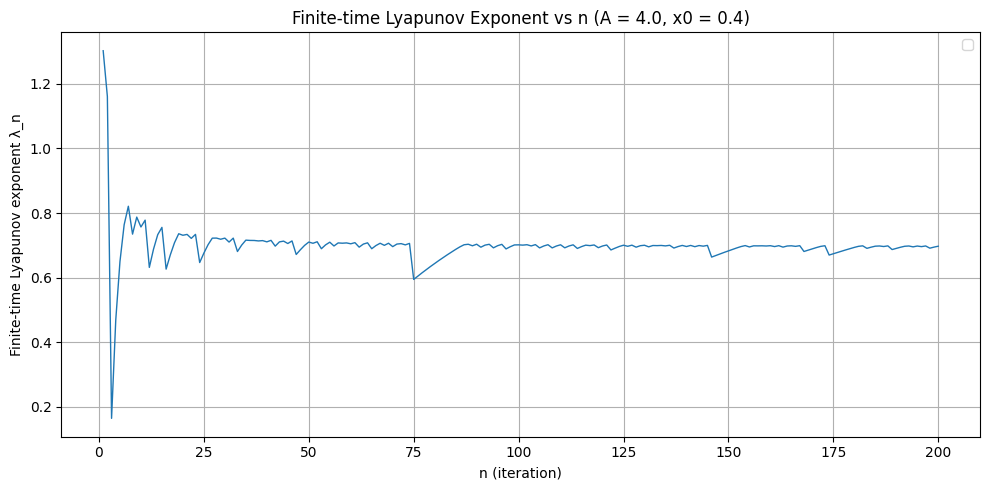

Lyapunov Exponent Experiment (A = 4)
  Final λ_n ≈ 0.69708
  Mean of last 100 λ_n values ≈ 0.69405


In [3]:
#I still don't seem to understand what this is
#Ok, let's just do the function
import numpy as np
import matplotlib.pyplot as plt
def logistic_map(A,x0,n_iter):
    #Iterating with parameters
    x_prev = [x0] #This is the initial value
    for i in range(0,n_iter):
        x_next = A * x_prev[-1]*(1-x_prev[-1])
        x_prev.append(x_next)
    return x_prev[1:] #Returns the entire array
#Now, to make the bifurcation diagram
A_Initial = 0.89
A_Final = 3.995
Step = 0.0125
n_iter = 200
transient = 15

A_values = np.arange(A_Initial,A_Final,Step)

#Arrays for Plotting
plot_As = []
plot_xs = []

for i in range(0,len(A_values)):
    xs = logistic_map(A_values[i],0.3,n_iter) #Choose any x0
    xs_steady = xs[transient:]
    #This As is just the same value repeated
    plot_As.append([A_values[i]]*len(xs_steady))
    plot_xs.append(xs_steady)
#Now we have some plot of A's and x's but what does this do?
plt.figure(figsize=(10, 6))
plt.scatter(plot_As, plot_xs, s=0.3, color='black', marker='.')
plt.xlabel('A (control parameter)')
plt.ylabel('x_n (after transient)')
plt.title('Bifurcation Diagram of the Logistic Map')
plt.xlim(A_Initial, A_Final)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


#Ok, now the Lyapunov experiment part:
#Now I think this x_n+1 is our f(x) from what I understood
A = 4.0
x0 = 0.4
n_iter = 200

xs = logistic_map(A,x0,n_iter)
xs = np.asarray(xs)
f_prime = abs((A * (1-2*(xs)))) #Absolute value
f_prime[f_prime==0] = 1e-16 #In case any derivative is 0
#Computing log:
logs = np.log(f_prime)
lambda_n = np.cumsum(logs) / np.arange(1, len(logs) + 1)

# plot λ_n vs n
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(lambda_n) + 1), lambda_n, linewidth=1)
plt.xlabel('n (iteration)')
plt.ylabel('Finite-time Lyapunov exponent λ_n')
plt.title(f'Finite-time Lyapunov Exponent vs n (A = {A}, x0 = {x0})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print("Lyapunov Exponent Experiment (A = 4)")
print(f"  Final λ_n ≈ {lambda_n[-1]:.5f}")
print(f"  Mean of last 100 λ_n values ≈ {np.mean(lambda_n[-100:]):.5f}")

#Alright, so from what I understood this is what we did:
#First we made a logistic map function
#Then we made some kind of bifurcation diagram and saw when
#The bifurcation was happening, and this illustrated the change
#of behavior
#Finally, We fixed A, and did a lyapunov experiment
#This quantifies how chaotic our logistic map is for A
#Depending on lambda
#In the report, I will try to remember to write when chaos
#Starts to happen
#But still, I would say this was difficult to intuitively get
#A feel for
